In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sb
plt.xkcd();
plt.interactive(True)

In [36]:
sf_df = pd.read_csv('../data/snowfall.csv').set_index(['Region', 'Sub-Region', 'Resort'])
sd_df = pd.read_csv('../data/snow_depth.csv').set_index(['Region', 'Sub-Region', 'Resort'])

In [3]:
def cols_as_dates(df):
    return [datetime.strptime(col, '%Y-%m-%d').date() for col in df.columns]

In [4]:
def year_group(df, mean=True):
    dates = cols_as_dates(df)
    date_year = [date.year for date in dates]
    years = np.arange(2009, 2018)
    out = df.copy()
    out.drop(columns=out.columns, inplace=True)
    for year in years:
        slices = np.where(date_year == year)
        df_filt = df.iloc[:, slices[0]]
        if mean:
            out[year] = df_filt.mean(axis=1).values
        else:
            out[year] = df_filt.sum(axis=1).values
    out[out.values == 0] = np.NaN
    return out

In [5]:
sf_sum = year_group(sf_df, False)
sd_avg = year_group(sd_df, True)

In [6]:
sf_sum[ sf_sum.index.get_level_values(1) == 'Colorado' ]

2009   2010   2011  \
Region        Sub-Region Resort                                               
United States Colorado   Arapahoe Basin Ski Area         19.0  130.0  305.0   
                         Aspen / Snowmass                46.0  278.0  253.0   
                         Beaver Creek                    56.0  254.0  264.0   
                         Breckenridge                    46.0  356.0  348.0   
                         Cooper                           8.0  135.0  141.0   
                         Copper Mountain Resort          25.0   90.0  226.0   
                         Crested Butte Mountain Resort   54.0  213.0  182.0   
                         Echo Mountain                   11.0  104.0  132.0   
                         Eldora Mountain Resort          30.0  105.0  144.0   
                         Howelsen Hill                    NaN    NaN    NaN   
                         Keystone                        31.0   91.0  250.0   
                         Loveland                        16.0  155.0  407.0   
                         Monarch Mountain                70.0  173.0  141.0   
                         Powderhorn                      62.0  160.0  150.0   
                         Purgatory                       55.0  260.0  155.0   
                         Silverton Mountain              84.0  323.0  333.0   
                         Ski Granby Ranch                 NaN   44.0   98.0   
                         Steamboat                       52.0  311.0  286.0   
                         Sunlight Mountain Resort         NaN   99.0  134.0   
                         Telluride                       56.0  236.0  114.0   
                         Vail                            53.0  342.0  362.0   
                         Winter Park Resort              52.0  276.0  286.0   
                         Wolf Creek Ski Area            107.0    NaN  304.0   

                                                         2012   2013   2014  \
Region        Sub-Region Resort                                               
United States Colorado   Arapahoe Basin Ski Area        181.0  336.0  455.0   
                         Aspen / Snowmass               235.0  306.0  346.0   
                         Beaver Creek                   193.0  184.0  288.0   
                         Breckenridge                   225.0  272.0  447.0   
                         Cooper                          94.0  157.0  258.0   
                         Copper Mountain Resort         181.0  257.0  406.0   
                         Crested Butte Mountain Resort  190.0  125.0  309.0   
                         Echo Mountain                  120.0    NaN    NaN   
                         Eldora Mountain Resort         195.0  203.0  340.0   
                         Howelsen Hill                    3.0    6.0   93.0   
                         Keystone                       123.0  173.0  293.0   
                         Loveland                       323.0  466.0  480.0   
                         Monarch Mountain               201.0  303.0  343.0   
                         Powderhorn                     168.0  252.0  202.0   
                         Purgatory                      288.0  179.0  163.0   
                         Silverton Mountain             308.0  234.0  284.0   
                         Ski Granby Ranch                79.0   42.0  168.0   
                         Steamboat                      314.0  292.0  272.0   
                         Sunlight Mountain Resort       103.0  143.0  172.0   
                         Telluride                      193.0  179.0  260.0   
                         Vail                           214.0  263.0  323.0   
                         Winter Park Resort             220.0  315.0  397.0   
                         Wolf Creek Ski Area            334.0  356.0  315.0   

                                                         2015   2016   2017  
Region        Sub-Region Re

In [7]:
sd_avg[ sd_avg.index.get_level_values(1) == 'Colorado' ]

2009        2010  \
Region        Sub-Region Resort                                                 
United States Colorado   Arapahoe Basin Ski Area        23.677419   27.690141   
                         Aspen / Snowmass               33.619048   55.251497   
                         Beaver Creek                   17.045455   34.493671   
                         Breckenridge                   23.375000   52.859649   
                         Cooper                         20.315789   35.197080   
                         Copper Mountain Resort         28.838710   40.901639   
                         Crested Butte Mountain Resort  24.883721   46.116788   
                         Echo Mountain                  22.105263   30.607692   
                         Eldora Mountain Resort         23.106383   37.493151   
                         Howelsen Hill                        NaN         NaN   
                         Keystone                       19.933333   25.538462   
                         Loveland                       19.935484   35.575342   
                         Monarch Mountain               29.133333   52.360544   
                         Powderhorn                     30.125000   38.398305   
                         Purgatory                      27.000000   53.729167   
                         Silverton Mountain             40.050000  109.833333   
                         Ski Granby Ranch               17.411765   17.629310   
                         Steamboat                      18.909091   54.801282   
                         Sunlight Mountain Resort       18.235294   42.215827   
                         Telluride                      28.790698   48.597122   
                         Vail                           17.645833   36.174699   
                         Winter Park Resort             21.450980   55.449102   
                         Wolf Creek Ski Area            57.225806   38.000000   

                                                              2011       2012  \
Region        Sub-Region Resort                                                 
United States Colorado   Arapahoe Basin Ski Area         54.662835  32.196172   
                         Aspen / Snowmass                69.128834  47.093333   
                         Beaver Creek                    48.740260  34.205298   
                         Breckenridge                    62.297143  39.778409   
                         Cooper                          44.565891  27.251852   
                         Copper Mountain Resort          64.920455  37.000000   
                         Crested Butte Mountain Resort   54.692857  35.696552   
                         Echo Mountain                   40.386861  39.941176   
                         Eldora Mountain Resort          44.883117  40.006536   
                         Howelsen Hill                         NaN  17.088496   
                         Keystone                        40.520958  26.279762   
                         Loveland                        58.267943  36.015544   
                         Monarch Mountain                58.277027  34.465278   
                         Powderhorn                      42.638655  37.923729   
                         Purgatory                       49.576389  42.788732   
                         Silverton Mountain             111.868966  67.689922   
                         Ski Granby Ranch                37.161017  22.346774   
                         Steamboat                       75.729730  43.585034   
                         Sunlight Mountain Resort        47.500000  31.451128   
                         Telluride                       45.364286  41.434483   
                         Vail                            59.981481  28.573248   
                         Winter Park Resort              57.589595  42.644970   
                         Wolf Creek Ski Area             72.756757  64.805031   

         

In [8]:
sf_df.iloc[:, 545:560].sum(axis=1).values

array([132.,   0.,   0., ...,   0.,   0.,   0.])

In [9]:
sf_df.head(3)

2009-05-12  2009-05-13  \
Region        Sub-Region Resort                                        
United States Alaska     Alyeska Resort              NaN         NaN   
                         Eaglecrest Ski Area         NaN         NaN   
                         Hilltop Ski Area            NaN         NaN   

                                              2009-05-14  2009-05-15  \
Region        Sub-Region Resort                                        
United States Alaska     Alyeska Resort              NaN         NaN   
                         Eaglecrest Ski Area         NaN         NaN   
                         Hilltop Ski Area            NaN         NaN   

                                              2009-05-27  2009-05-28  \
Region        Sub-Region Resort                                        
United States Alaska     Alyeska Resort              NaN         NaN   
                         Eaglecrest Ski Area         NaN         NaN   
                         Hilltop Ski Area            NaN         NaN   

                                              2009-05-29  2009-05-30  \
Region        Sub-Region Resort                                        
United States Alaska     Alyeska Resort              NaN         NaN   
                         Eaglecrest Ski Area         NaN         NaN   
                         Hilltop Ski Area            NaN         NaN   

                                              2009-05-31  2009-06-01  \
Region        Sub-Region Resort                                        
United States Alaska     Alyeska Resort              NaN         NaN   
                         Eaglecrest Ski Area         NaN         NaN   
                         Hilltop Ski Area            NaN         NaN   

                                                 ...      2018-07-29  \
Region        Sub-Region Resort                  ...                   
United States Alaska     Alyeska Resort          ...             NaN   
                         Eaglecrest Ski Area     ...             NaN   
                         Hilltop Ski Area        ...             NaN   

                                              2018-07-30  2018-07-31  \
Region        Sub-Region Resort                                        
United States Alaska     Alyeska Resort              NaN         NaN   
                         Eaglecrest Ski Area         NaN         NaN   
                         Hilltop Ski Area            NaN         NaN   

                                              2018-08-01  2018-08-03  \
Region        Sub-Region Resort                                        
United States Alaska     Alyeska Resort              NaN         NaN   
                         Eaglecrest Ski Area         NaN         NaN   
                         Hilltop Ski Area            NaN         NaN   

                                              2018-08-04  2018-08-05  \
Region        Sub-Region Resort                                        
United States Alaska     Alyeska Resort              NaN         NaN   
                         Eaglecrest Ski Area         NaN         NaN   
                         Hilltop Ski Area            NaN         NaN   

                                              2018-08-06  2018-08-07  \
Region        Sub-Region Resort                                        
United States Alaska     Alyeska Resort              NaN         NaN   
                         Eaglecrest Ski Area         NaN         NaN   
                         Hilltop Ski Area            NaN         NaN   

                                              2018-08-08  
Region        Sub-Region Resort                           
United States Alaska     Alyeska Resort              NaN  
                         Eaglecrest Ski Area         NaN  
                         Hilltop Ski Area            NaN  

[3 rows x 3325 columns]

### EDA Plots

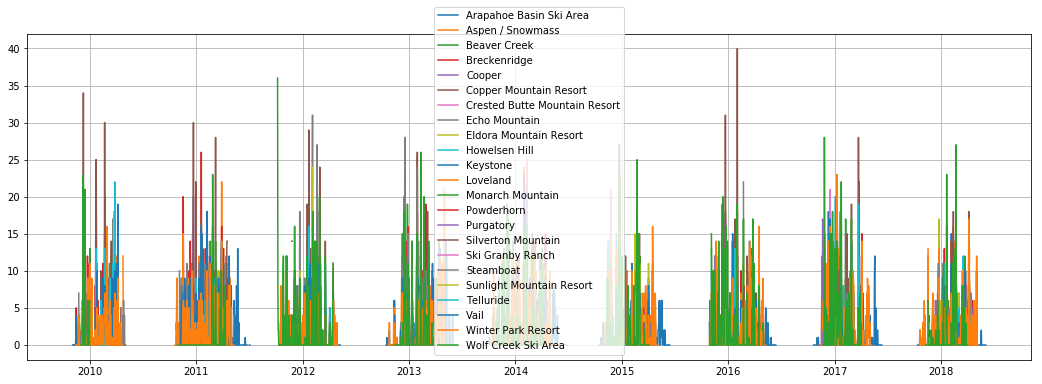

In [10]:
dates = cols_as_dates(sf_df)
filt_df = sf_df[ sf_df.index.get_level_values(1) == 'Colorado' ]

plt.figure(figsize=(18,6))
for index, row in filt_df.iterrows():
    plt.plot(dates, row.values, label=index[2])
plt.grid()
plt.legend();

/Users/lukeolson/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/lukeolson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/lukeolson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Users/lukeolson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Users/lukeolson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)
No handles with labels found to put in legend.


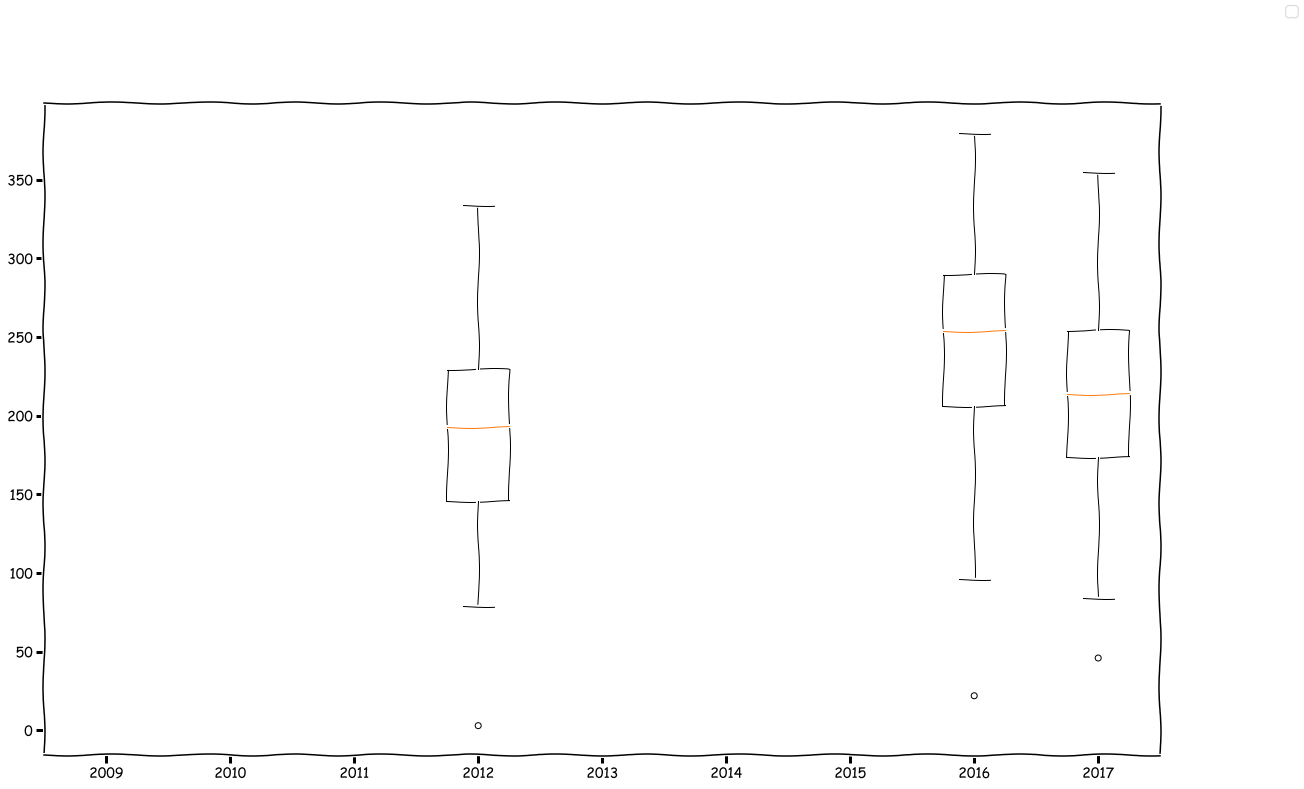

In [64]:
locs = ['Colorado']
fig = plt.figure(212, figsize=(20,12))
i = 111
for loc in locs:
    ax = fig.add_subplot(i)
    filt = sf_sum[ sf_sum.index.get_level_values(1) == loc ]
    ax.boxplot(filt.values, labels=filt.columns)
    i += 11
fig.legend();

In [12]:
filt.columns

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')

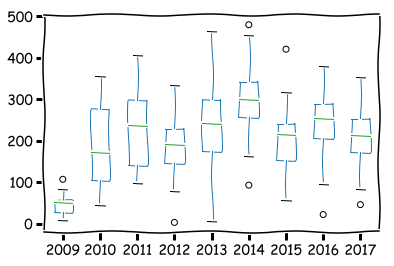

In [67]:
filt.plot.box(filt)

In [14]:
filt

2009   2010   2011  \
Region        Sub-Region Resort                                               
United States Colorado   Arapahoe Basin Ski Area         19.0  130.0  305.0   
                         Aspen / Snowmass                46.0  278.0  253.0   
                         Beaver Creek                    56.0  254.0  264.0   
                         Breckenridge                    46.0  356.0  348.0   
                         Cooper                           8.0  135.0  141.0   
                         Copper Mountain Resort          25.0   90.0  226.0   
                         Crested Butte Mountain Resort   54.0  213.0  182.0   
                         Echo Mountain                   11.0  104.0  132.0   
                         Eldora Mountain Resort          30.0  105.0  144.0   
                         Howelsen Hill                    NaN    NaN    NaN   
                         Keystone                        31.0   91.0  250.0   
                         Loveland                        16.0  155.0  407.0   
                         Monarch Mountain                70.0  173.0  141.0   
                         Powderhorn                      62.0  160.0  150.0   
                         Purgatory                       55.0  260.0  155.0   
                         Silverton Mountain              84.0  323.0  333.0   
                         Ski Granby Ranch                 NaN   44.0   98.0   
                         Steamboat                       52.0  311.0  286.0   
                         Sunlight Mountain Resort         NaN   99.0  134.0   
                         Telluride                       56.0  236.0  114.0   
                         Vail                            53.0  342.0  362.0   
                         Winter Park Resort              52.0  276.0  286.0   
                         Wolf Creek Ski Area            107.0    NaN  304.0   

                                                         2012   2013   2014  \
Region        Sub-Region Resort                                               
United States Colorado   Arapahoe Basin Ski Area        181.0  336.0  455.0   
                         Aspen / Snowmass               235.0  306.0  346.0   
                         Beaver Creek                   193.0  184.0  288.0   
                         Breckenridge                   225.0  272.0  447.0   
                         Cooper                          94.0  157.0  258.0   
                         Copper Mountain Resort         181.0  257.0  406.0   
                         Crested Butte Mountain Resort  190.0  125.0  309.0   
                         Echo Mountain                  120.0    NaN    NaN   
                         Eldora Mountain Resort         195.0  203.0  340.0   
                         Howelsen Hill                    3.0    6.0   93.0   
                         Keystone                       123.0  173.0  293.0   
                         Loveland                       323.0  466.0  480.0   
                         Monarch Mountain               201.0  303.0  343.0   
                         Powderhorn                     168.0  252.0  202.0   
                         Purgatory                      288.0  179.0  163.0   
                         Silverton Mountain             308.0  234.0  284.0   
                         Ski Granby Ranch                79.0   42.0  168.0   
                         Steamboat                      314.0  292.0  272.0   
                         Sunlight Mountain Resort       103.0  143.0  172.0   
                         Telluride                      193.0  179.0  260.0   
                         Vail                           214.0  263.0  323.0   
                         Winter Park Resort             220.0  315.0  397.0   
                         Wolf Creek Ski Area            334.0  356.0  315.0   

                                                         2015   2016   2017  
Region        Sub-Region Re

In [15]:
mask = sf_sum.index.get_level_values(1) == 'Colorado'

/Users/lukeolson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


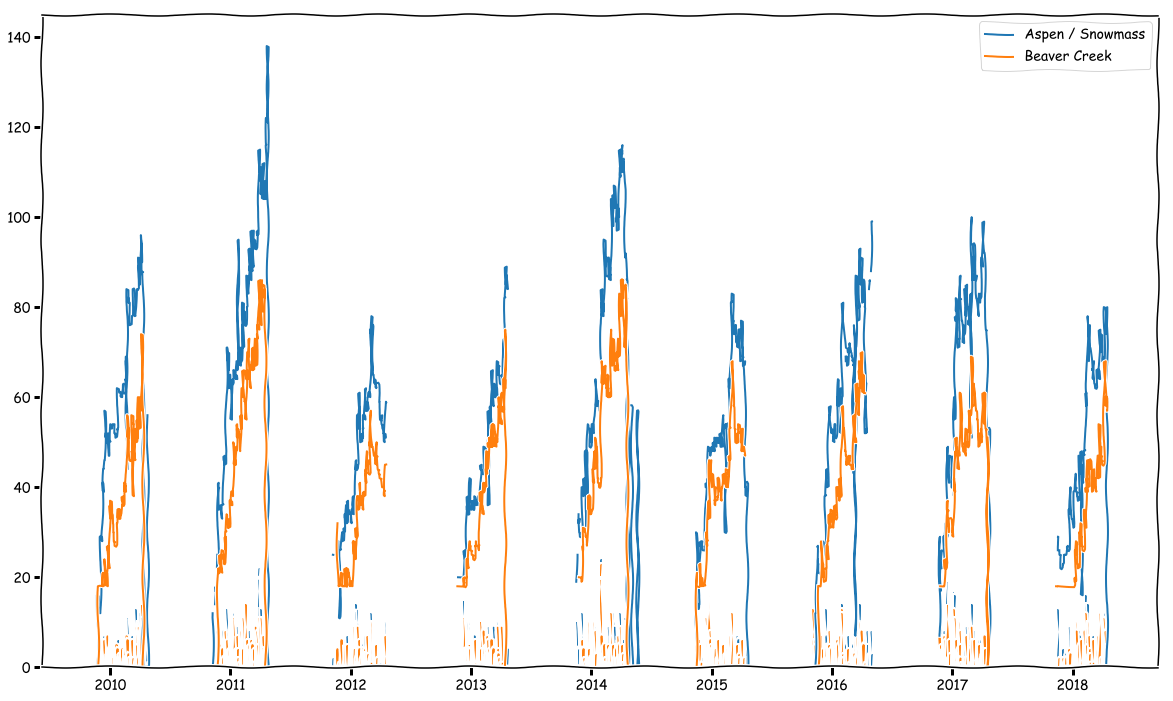

In [68]:
dates = cols_as_dates(sf_df)
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
slice_start = 1
slice_end = 3
for i, row in sd_df[ mask ][slice_start : slice_end].iterrows():
    ax.plot(dates, row.values, label=i[2])
    ax2.bar(dates, sf_df[ mask ][slice_start : slice_end].loc[i].values)
ax.grid(0.3)
ax.legend();